In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./spameyes_dataset.csv")
print(df)

      label                                               text
0      spam  naturally irresistible your corporate identity...
1      spam  the stock trading gunslinger fanny is merrill ...
2      spam  unbelievable new homes made easy im wanting to...
3      spam  4 color printing special request additional in...
4      spam  do not have money get software cds from here s...
...     ...                                                ...
64903   ham                                \Wen u miss someone
64904   ham  Edison has rightly said, \A fool can ask more ...
64905   ham      I just lov this line: \Hurt me with the truth
64906   ham  \HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...
64907   ham  When I was born, GOD said, \Oh No! Another IDI...

[64908 rows x 2 columns]


In [9]:
# Viewing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64908 entries, 0 to 64907
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   64908 non-null  object
 1   text    64908 non-null  object
dtypes: object(2)
memory usage: 1014.3+ KB


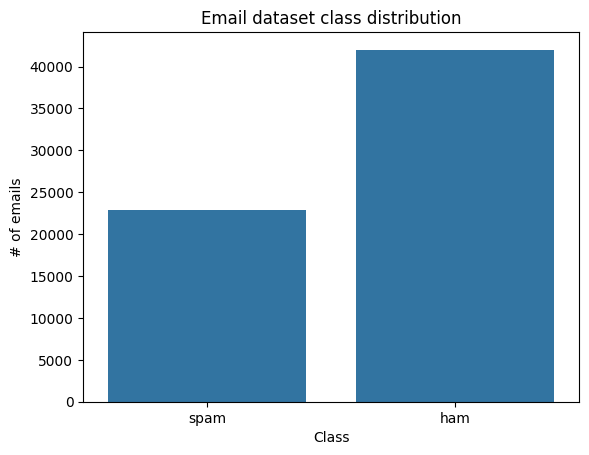

In [10]:
# Class distribution by bar plot
sns.countplot(x = "label", data = df)
plt.title("Email dataset class distribution")
plt.xlabel("Class")
plt.ylabel("# of emails")
plt.show()

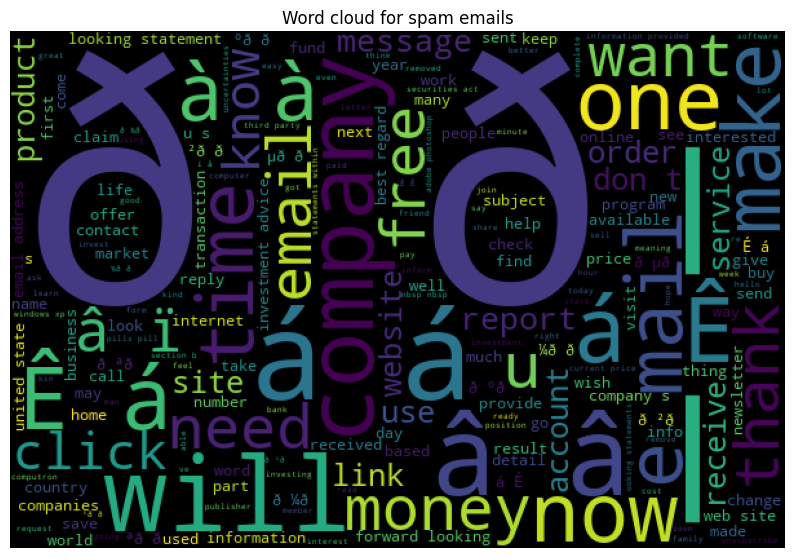

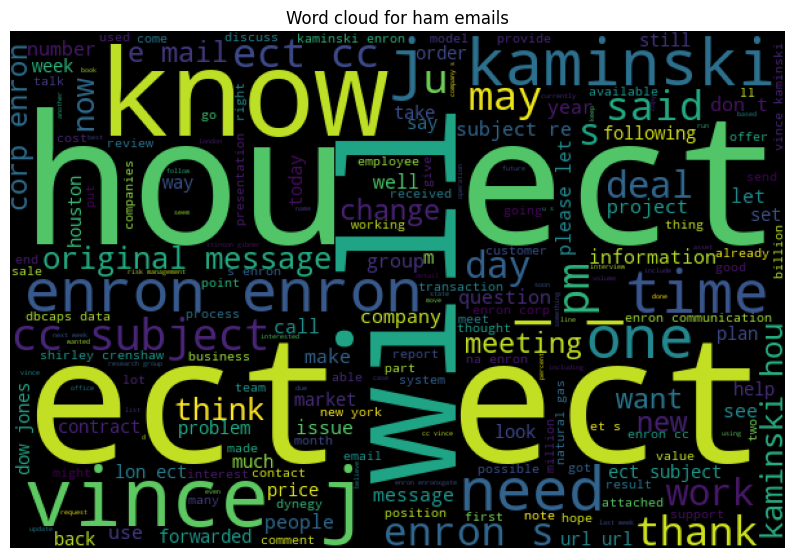

In [15]:
from wordcloud import WordCloud

# Word cloud for spam emails
spamWords = " ".join(df[df["label"] == "spam"]["text"])
spamWordCloud = WordCloud(width = 600, height = 400).generate(spamWords)
plt.figure(figsize = (10, 8))
plt.imshow(spamWordCloud)
plt.title("Word cloud for spam emails")
plt.axis("off")
plt.show()

# Word cloud for ham emails
hamWords = " ".join(df[df["label"] == "ham"]["text"])
hamWordCloud = WordCloud(width = 600, height = 400).generate(hamWords)
plt.figure(figsize = (10, 8))
plt.imshow(hamWordCloud)
plt.title("Word cloud for ham emails")
plt.axis("off")
plt.show()

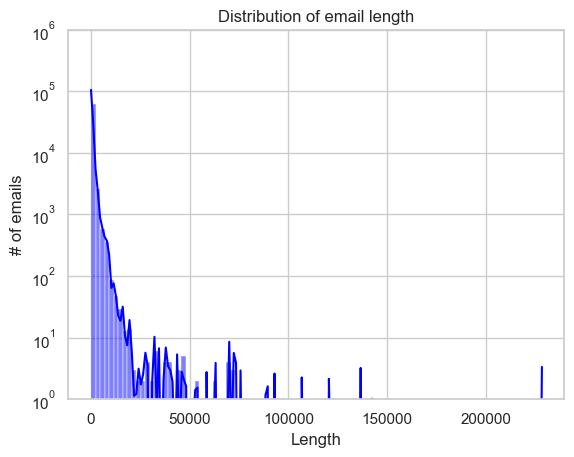

In [21]:
# Set seaborn style and color palette
sns.set(style="whitegrid", palette="pastel")

# Distribution of email length
df["length"] = df["text"].apply(len)
sns.histplot(data=df, x="length", bins=100, kde=True, color="blue")
plt.title("Distribution of email length")
plt.xlabel("Length")
plt.ylabel("# of emails")
plt.yscale("log")       # Logarithmic scale becausae email distribution is skewed a lot
plt.ylim(1, 1e6)
plt.show()

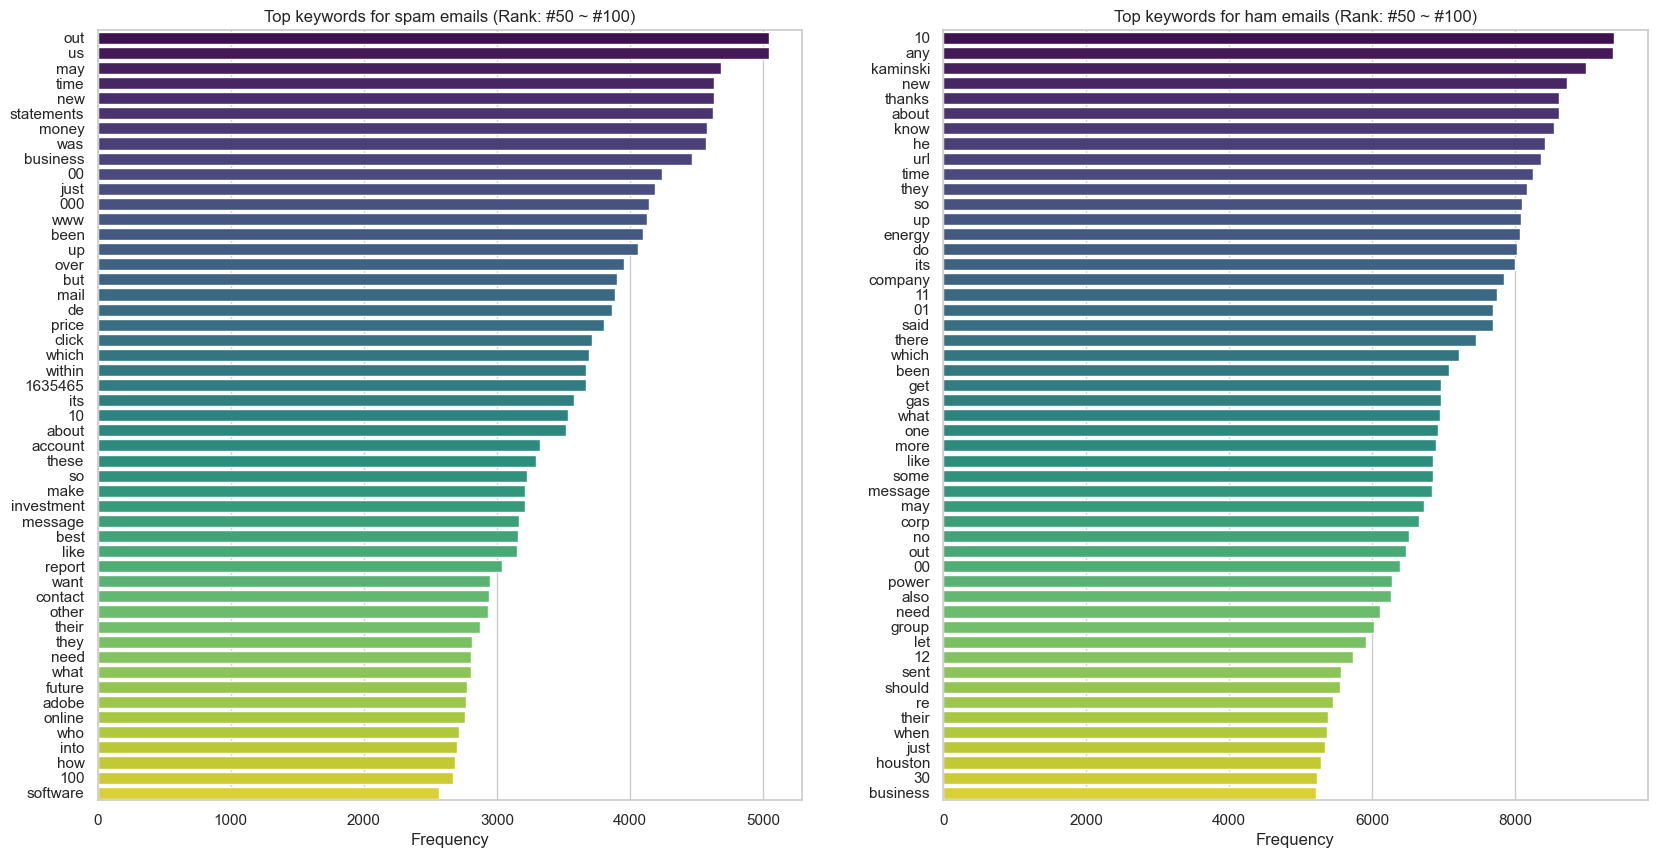

In [33]:
# Top ngram keywords for spam emails
from sklearn.feature_extraction.text import CountVectorizer

def getTopNGrams(text: pd.Series, n: int,  start: int, end: int):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text)
    bagOfWords = vec.transform(text)
    sumOfWords = bagOfWords.sum(axis=0)
    wordsFrequency = [(word, sumOfWords[0, idx]) for word, idx in vec.vocabulary_.items()]
    wordsFrequency = sorted(wordsFrequency, key=lambda x: x[1], reverse=True)
    return wordsFrequency[start-1:end]

ngramCount = 1
rankSearchLimitStart = 50
rankSearchLimitEnd = 100

# spam emails
topNgrams = getTopNGrams(df[df["label"] == "spam"]["text"], ngramCount, rankSearchLimitStart, rankSearchLimitEnd)
topNgrams = dict(topNgrams)

# ham emails
topNgrams_ham = getTopNGrams(df[df["label"] == "ham"]["text"], ngramCount, rankSearchLimitStart, rankSearchLimitEnd)
topNgrams_ham = dict(topNgrams_ham)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x=list(topNgrams.values()), y=list(topNgrams.keys()), hue=list(topNgrams.keys()), palette="viridis", legend=False, ax=ax1)
ax1.set_title(f"Top keywords for spam emails (Rank: #{rankSearchLimitStart} ~ #{rankSearchLimitEnd})")
ax1.set_xlabel("Frequency")

sns.barplot(x=list(topNgrams_ham.values()), y=list(topNgrams_ham.keys()), hue=list(topNgrams_ham.keys()), palette="viridis", legend=False, ax=ax2)
ax2.set_title(f"Top keywords for ham emails (Rank: #{rankSearchLimitStart} ~ #{rankSearchLimitEnd})")
ax2.set_xlabel("Frequency")

plt.show()